<center>

# Final Exam 

### Data Mining, Machine Learning and Deep Learning

### [KAN - CDSCO1004U]
<center>

# Table of Contents
1. [Data Exploration](#1-data-exploration)
2. [Data Preprocessing](#2-data-preprocessing)
3. [Modelling](#3-modelling)

    a. [Random Forest](#3a)

    b. [Neural Network](#3b)

    c. [Logistic Regression](#3c)
    
    d. [Support Vector Machine](#3d)

4.  [Model Tuning](#4)

    a. [Random Forest](#4a)

    b. [Neural Network](#4b)

    c. [Logistic Regression](#4c)
    
    d. [Support Vector Machine](#4d)

5.  [Voting Threshold Machine (VTM)](#5)

    a. [Optimizing Threshold](#5a)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras_tuner.tuners import RandomSearch
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from IPython.display import clear_output

# Personal imports
import helpers as hlp
from helpers import evaluate

<a id='1'></a>
## 1. Data Exploration

In [3]:
df = pd.read_csv("/Users/fredegot/Documents/DS/2nd Semester/Data Mining & Machine Learning/Exam Project/heloc_dataset_v1 (1).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [5]:
# Getting basic statistical details
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


Three 'describing' values: 
- `-9` No Bureau Record or No Investigation 
- `-8` No Usable/Valid Trades or Inquires 
- `-7` Condition not Met
We can see that -9 is the lowest number of every column.

There are potential outliers, since max value often exceds the 75 percentlie

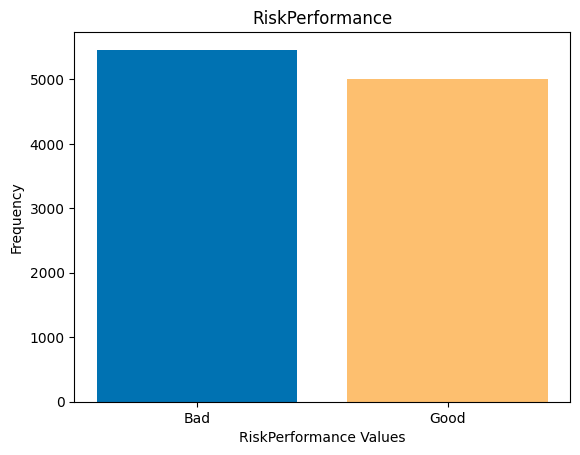

In [6]:
hlp.BarPlot(df['RiskPerformance'])

We can see that there is a good balance between Good and Bad, with 47.% Good and 52.2% Bad. 

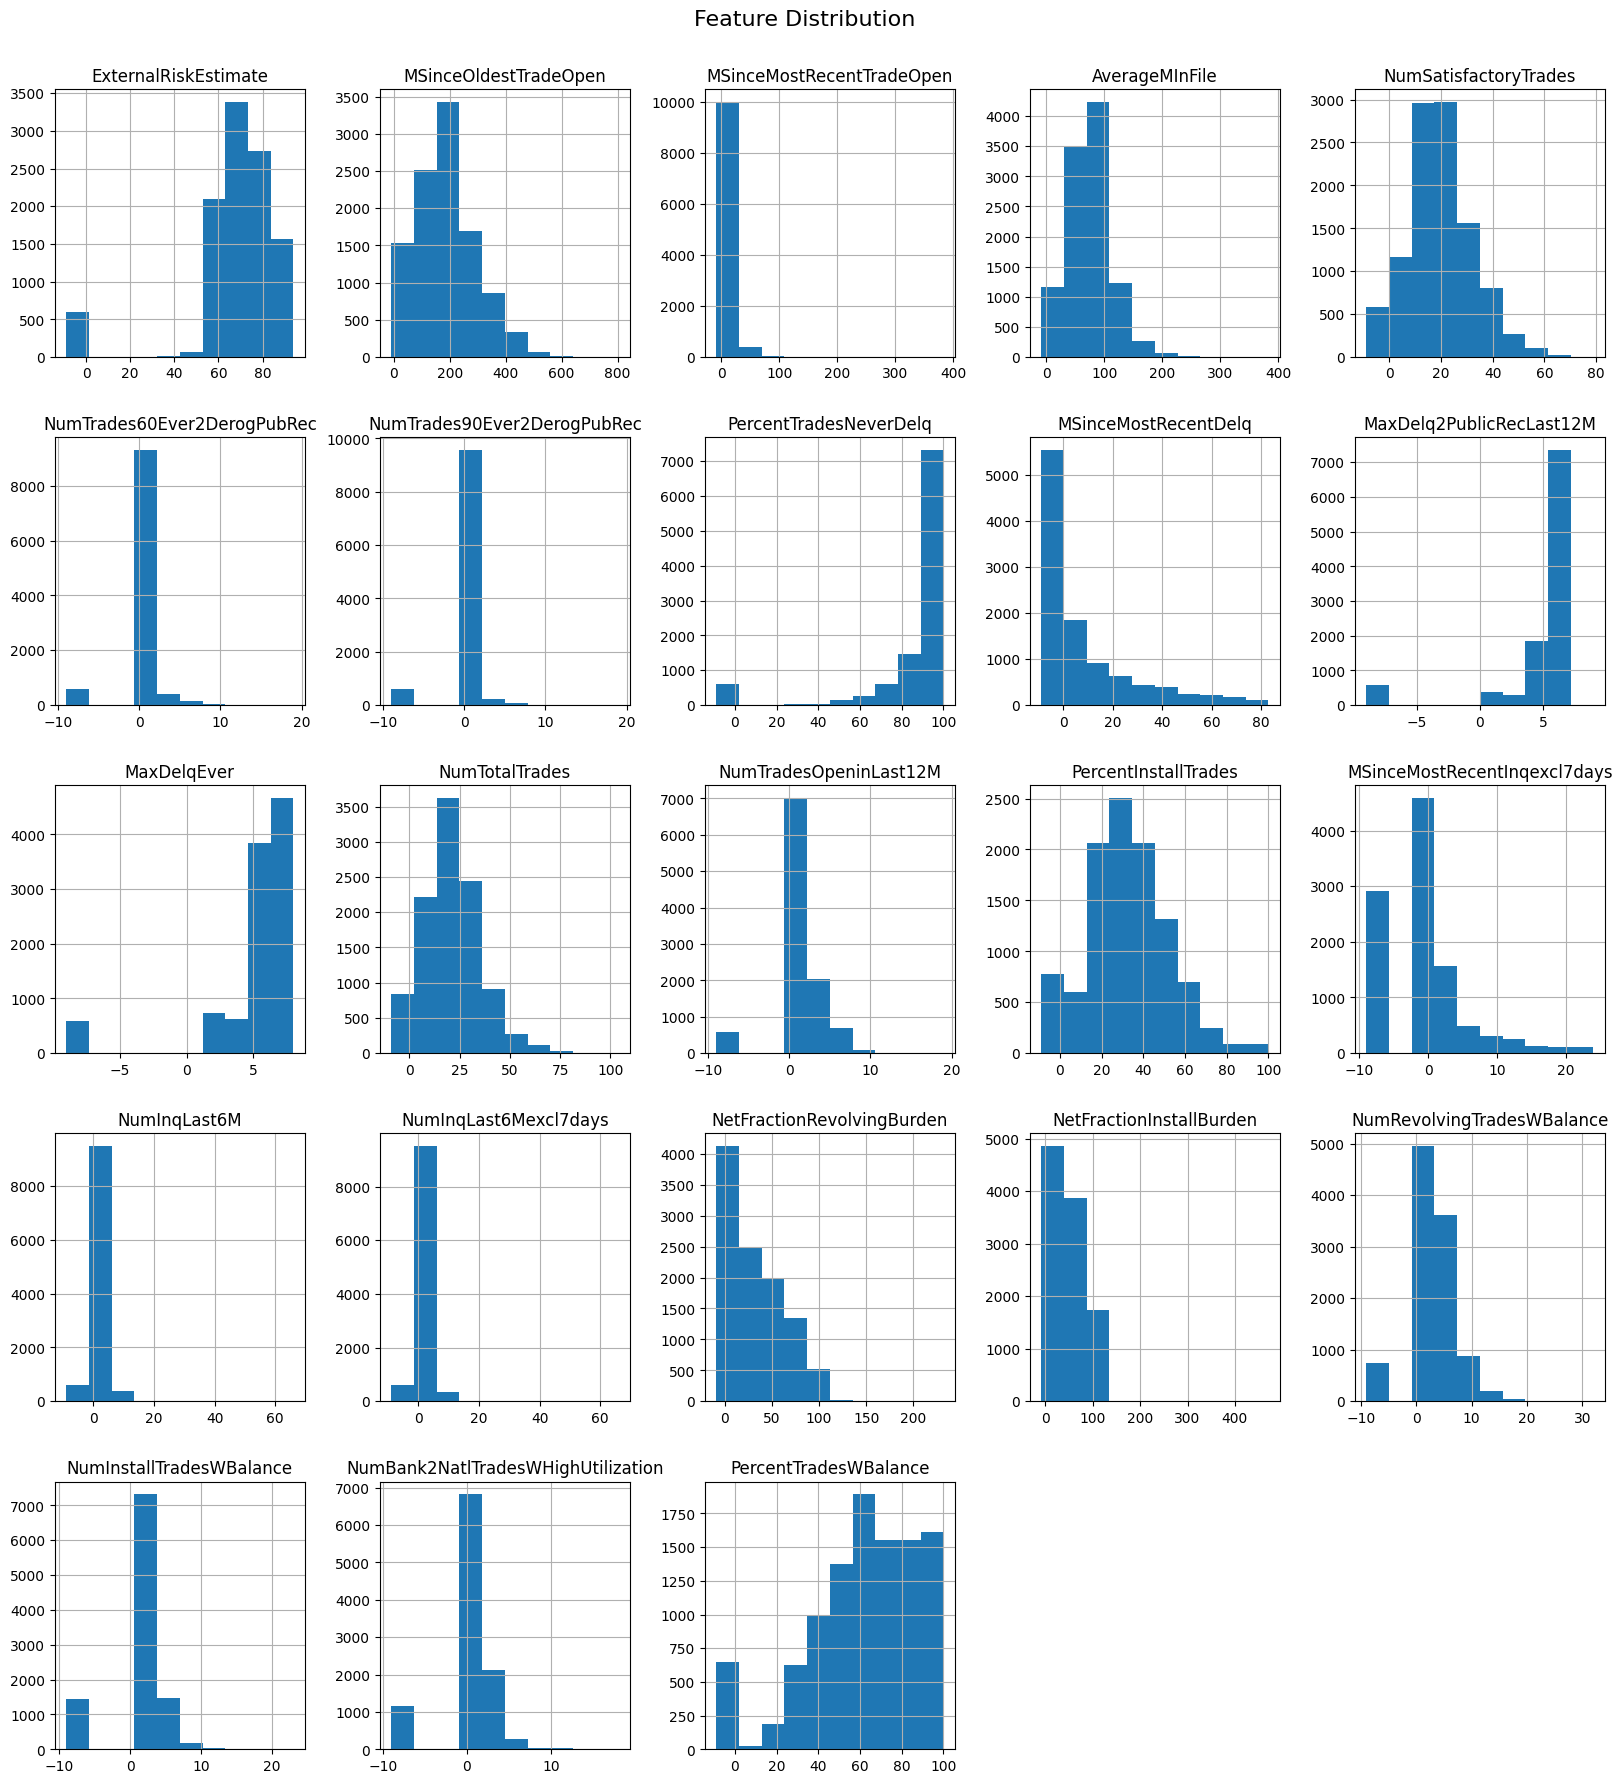

In [7]:
# Distribution with historgrams 
df.hist(bins=10, figsize=(20,20))

plt.suptitle('Feature Distribution', fontsize = 16)
plt.subplots_adjust(top = 0.94)

plt.show()

<a id='2'></a>
# 2. Data Preprocessing

In [8]:
# Label Encoder for 'RiskPerformance'
label = LabelEncoder()
df['RiskPerformance'] = label.fit_transform(df['RiskPerformance'])

In [9]:
#Detecting outliers
def detect_outliers(df):
    fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(25,10))
    fig.suptitle('Boxplots of all columns', fontsize=20)

    outliers = set()
    for i, col in enumerate(df.columns):
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        column_outliers = set(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
        outliers = outliers.union(column_outliers)
        
        # Plot boxplot in corresponding subplot
        ax = axes[i // 6][i % 6]
        ax.boxplot(df[col])
        ax.set_title(col)
        ax.scatter(list(column_outliers), df[col][list(column_outliers)], color='r')
    return outliers

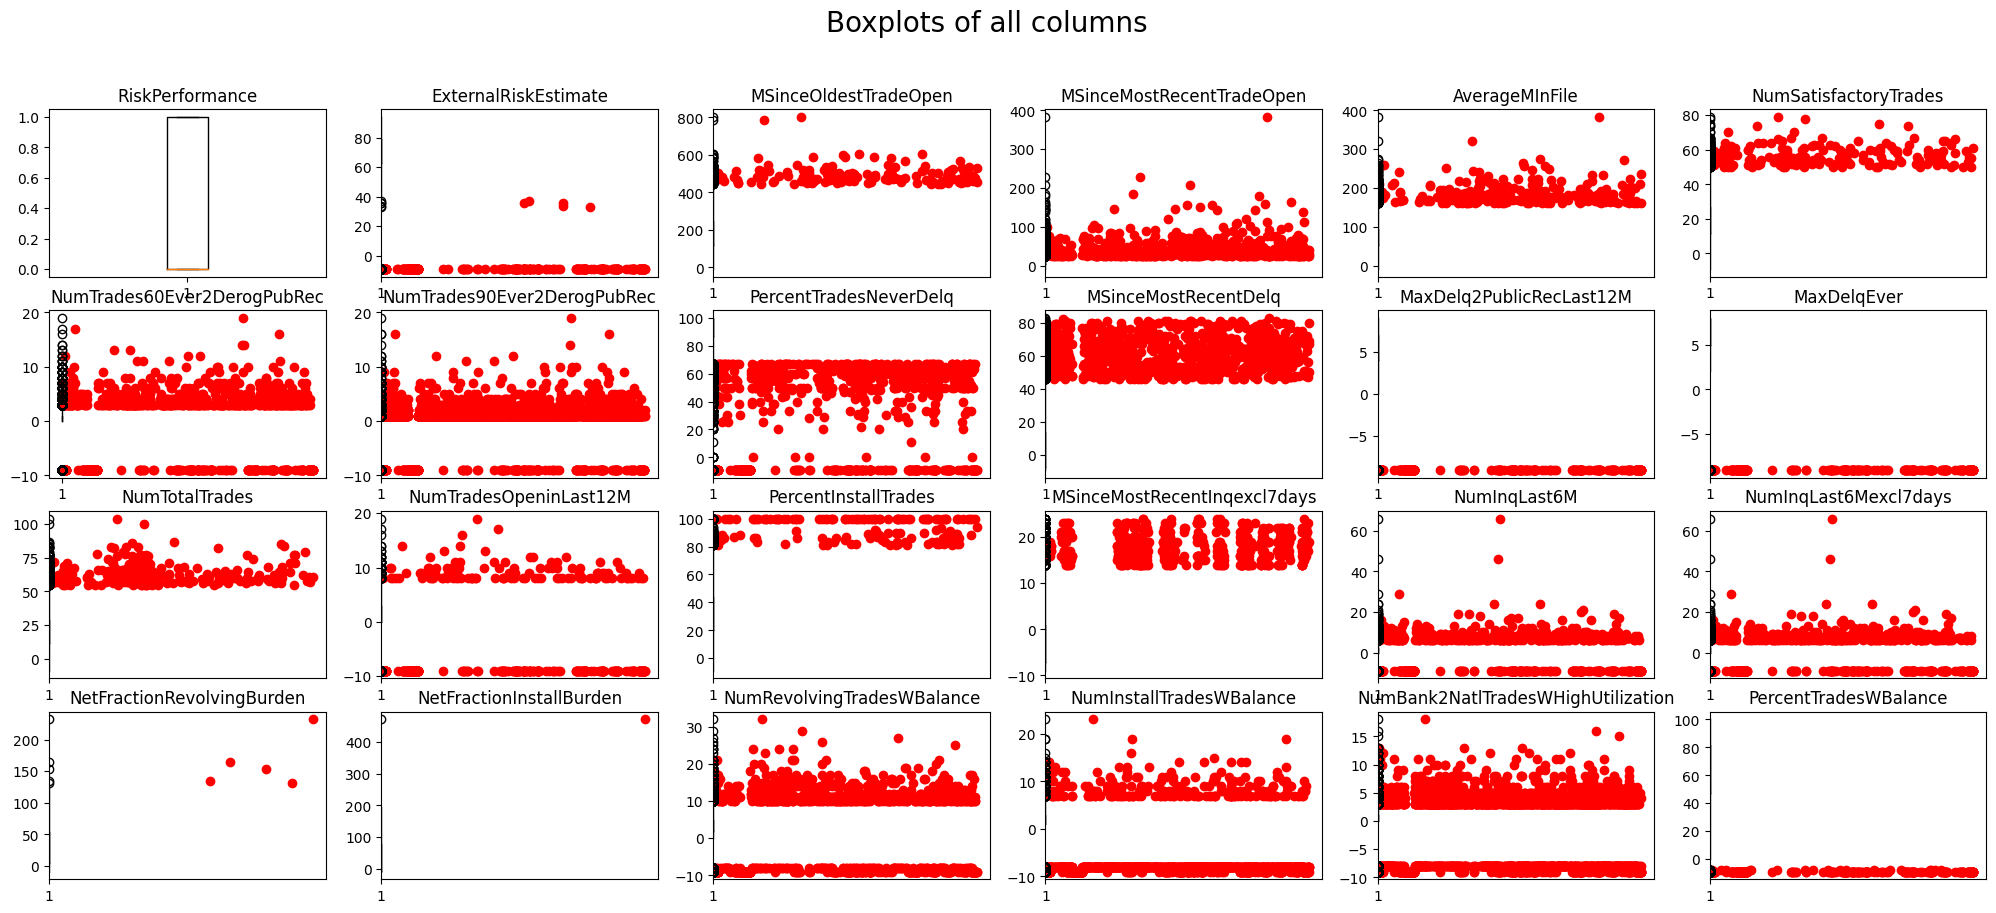

In [10]:
# Only works after label encoder
outliers = detect_outliers(df)
plt.show()

The red dots indicates wheter there are outliers for the given variable. It seems to be alot of outliers, but this is not the best indications. Due to the desribing minus values, as mentioned earlier, alot of outliers are detected for every column. But we do see that there are possibly some outliers for columns like: 
- `NetFractionRevolvingBurden`
- `NetFractionInstallBurden`
- `MSinceMostRecentTradeOpen` 
- `NumInqLast6M`

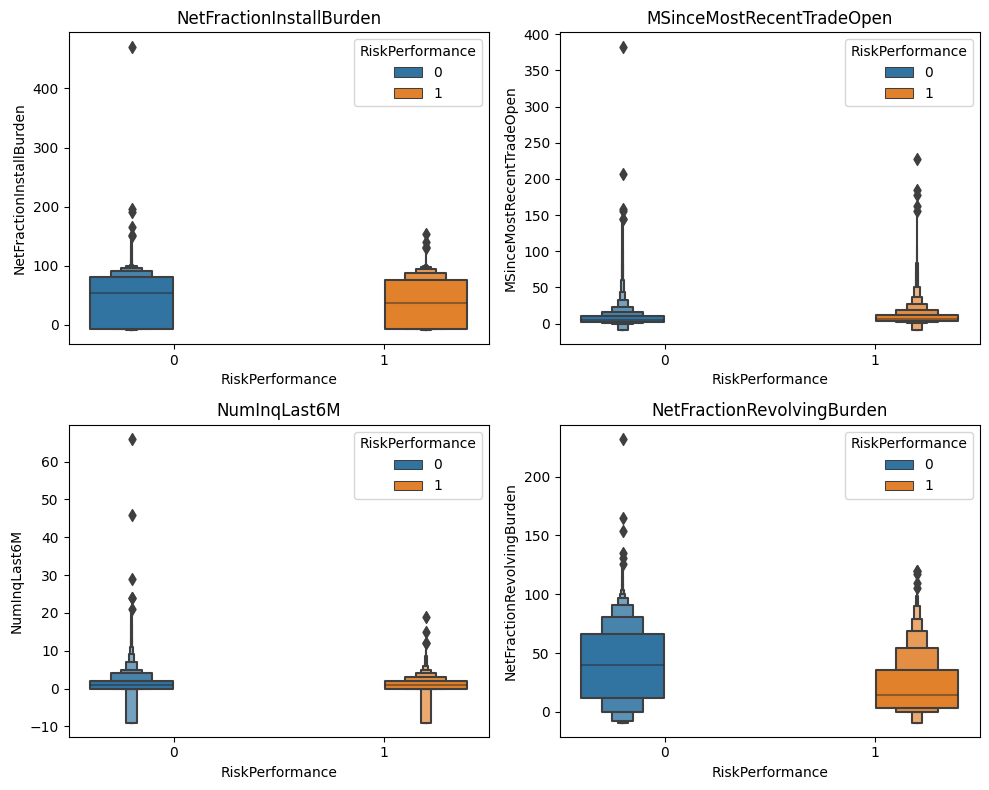

In [11]:
# Plotting the mentioned columns

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionInstallBurden', hue='RiskPerformance', data=df, ax=axes[0, 0])
axes[0, 0].set_title('NetFractionInstallBurden')

# Plot the second boxplot
sns.boxenplot(x='RiskPerformance', y='MSinceMostRecentTradeOpen', hue='RiskPerformance', data=df, ax=axes[0, 1])
axes[0, 1].set_title('MSinceMostRecentTradeOpen')

# Plot the third boxplot
sns.boxenplot(x='RiskPerformance', y='NumInqLast6M', hue='RiskPerformance', data=df, ax=axes[1, 0])
axes[1, 0].set_title('NumInqLast6M')

# Plot the fourth boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionRevolvingBurden', hue='RiskPerformance', data=df, ax=axes[1, 1])
axes[1, 1].set_title('NetFractionRevolvingBurden')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# Replacing Outliers with Null values
for x in ['NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'MSinceMostRecentTradeOpen', 'NumInqLast6M']: 
    Q3, Q1 = np.percentile(df.loc[:,x], [75,25])
    IQR = Q3 - Q1

    Max = Q3+(1.5*IQR)
    Min = Q1-(1.5*IQR)

    # Data points thats outside of min or max bound with a NULL value 
    df.loc[df[x] < Min,x] = np.nan
    df.loc[df[x] > Max,x] = np.nan

# Dropping the null values
df.dropna(axis = 0, inplace = True)

In [13]:
# Extracting feature variables and target column
y = df.loc[:,'RiskPerformance']
X = df.drop(['RiskPerformance'], axis = 1)

# Scaling 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [167]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<a id='3'></a>
# 3. Modelling

<a id='3a'></a>
## Random Forest

Random Forest
 Accuracy: 0.721

 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       893
           1       0.74      0.67      0.70       852

    accuracy                           0.72      1745
   macro avg       0.72      0.72      0.72      1745
weighted avg       0.72      0.72      0.72      1745

 Confusion Matrix:


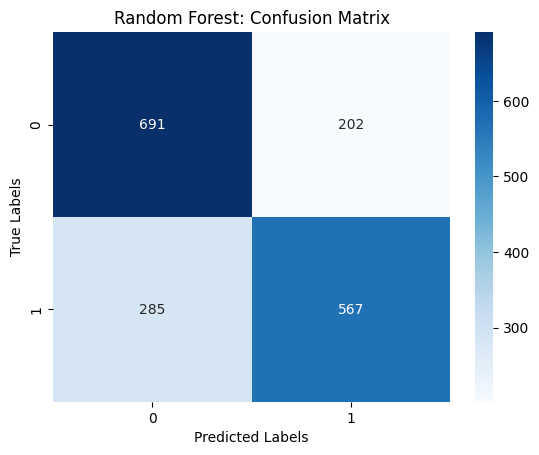

In [15]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=30, random_state=9)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the rf
evaluate(y_test, y_pred_rf, "Random Forest")

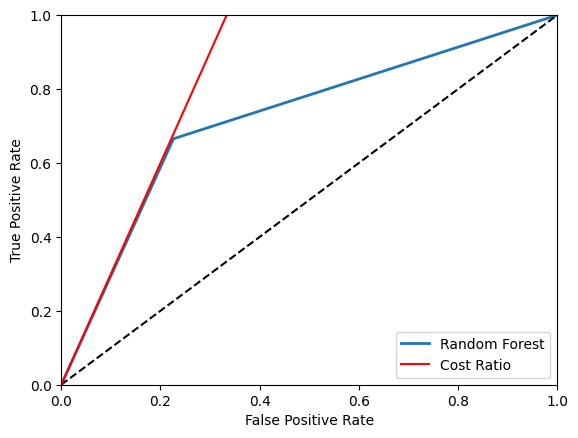

In [16]:
#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')

#plot a line with cost ratio in red
plt.plot([0, 1], [0, 3], 'r-', label="Cost Ratio")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# random forest with a twist

Random Forest
 Accuracy: 0.659

 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.74       893
           1       0.88      0.35      0.50       852

    accuracy                           0.66      1745
   macro avg       0.74      0.65      0.62      1745
weighted avg       0.74      0.66      0.62      1745

 Confusion Matrix:


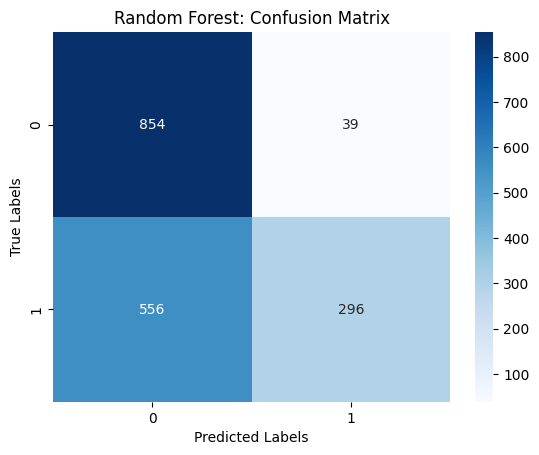

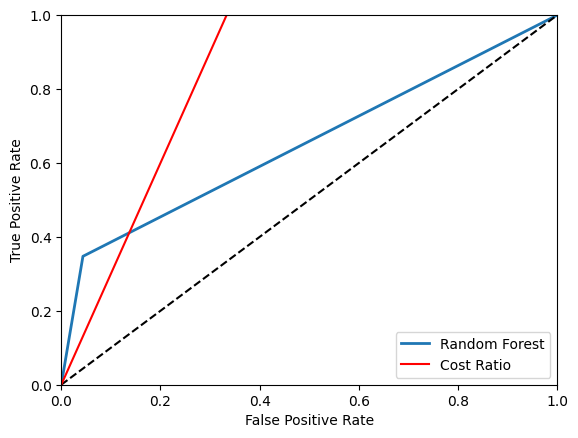

In [40]:
#cost matrix
profit_good_loan = 1000
loss_bad_loan = 3000

# Calculate the class weights profit_good_loan/loss_bad_loan
class_weights = {0: 1.0, 1: profit_good_loan/loss_bad_loan}

# Random Forest Classifier
rf_cs = RandomForestClassifier(n_estimators=50, max_leaf_nodes=30, random_state=9, class_weight=class_weights)
rf_cs.fit(X_train, y_train)
y_pred_rf = rf_cs.predict(X_test)

# Evaluate the rf
evaluate(y_test, y_pred_rf, "Random Forest")

#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')

#plot a line with cost ratio in red
plt.plot([0, 1], [0, 3], 'r-', label="Cost Ratio")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()



<a id='3b'></a>
## Neural Network

2023-05-17 14:54:03.279003: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
110/110 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5484
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.6448
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.6785
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5950 - accuracy: 0.6977
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.7047
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.7111
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.7090
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.7182
Epoch 9/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.7177
Epoch 10/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5717 - accura

110/110 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.7372
Epoch 82/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7375
Epoch 83/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.7391
Epoch 84/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.7374
Epoch 85/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.7338
Epoch 86/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5400 - accuracy: 0.7395
Epoch 87/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7375
Epoch 88/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.7384
Epoch 89/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.7351
Epoch 90/100
110/110 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 

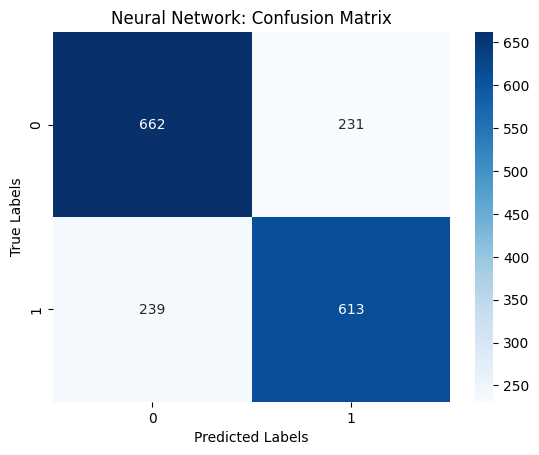

In [18]:
# Simple Neural Network
NN_simple_model = Sequential()
NN_simple_model.add(Dense(160, activation='relu', input_shape=(X_train.shape[1],)))
NN_simple_model.add(Dropout(0.3))
NN_simple_model.add(Dense(160, activation='relu'))
NN_simple_model.add(Dropout(0.2))
NN_simple_model.add(Dense(160, activation='relu'))
NN_simple_model.add(Dropout(0.3))
NN_simple_model.add(Dense(1, activation='sigmoid'))

# Compile the model
NN_simple_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy"])

# Train the model
NN_simple_model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Predict with the model
y_pred_nn = (NN_simple_model.predict(X_test) > 0.5).astype("int32")

evaluate(y_test, y_pred_nn, "Neural Network")

<a id='3c'></a>
## Logistic Regression

Logistic Regression
 Accuracy: 0.731

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       893
           1       0.73      0.71      0.72       852

    accuracy                           0.73      1745
   macro avg       0.73      0.73      0.73      1745
weighted avg       0.73      0.73      0.73      1745

 Confusion Matrix:


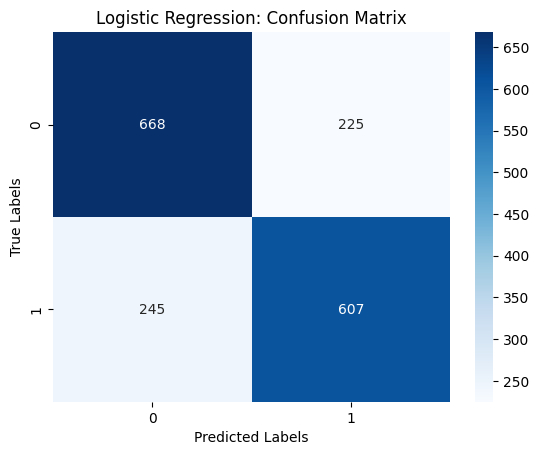

In [19]:
# Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
evaluate(y_test, y_pred_lr, "Logistic Regression")

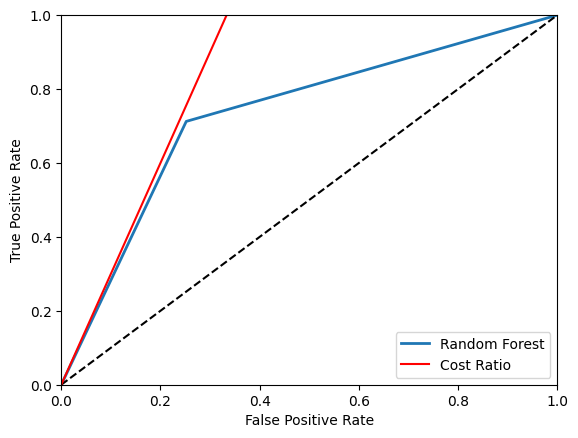

In [20]:
#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')

#plot a line with cost ratio in red
plt.plot([0, 1], [0, 3], 'r-', label="Cost Ratio")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


## logistic regression with a twist

Profit: 171000$
Precision: 0.8704225352112676
Logistic Regression with Cost Matrix
 Accuracy: 0.662

 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.95      0.74       893
           1       0.87      0.36      0.51       852

    accuracy                           0.66      1745
   macro avg       0.74      0.66      0.63      1745
weighted avg       0.74      0.66      0.63      1745

 Confusion Matrix:


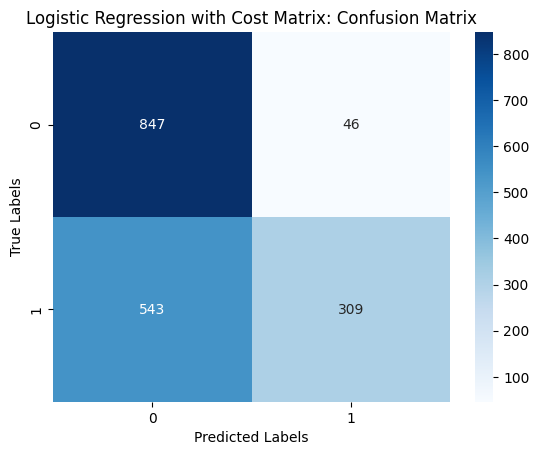

In [21]:
from sklearn.linear_model import LogisticRegression

#cost matrix
profit_good_loan = 1000
loss_bad_loan = 3000

# Calculate the class weights profit_good_loan/loss_bad_loan
class_weights = {0: 1.0, 1: profit_good_loan/loss_bad_loan}

# Instantiate the model
lr_cs = LogisticRegression(class_weight=class_weights, random_state=42)

# Train the model
lr_cs.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = lr_cs.predict(X_test)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate total cost
profit = confusion[0, 1] * -3000 + confusion[1, 1] * 1000

print(f"Profit: {profit}$")

#print precision
print(f"Precision: {confusion[1,1]/(confusion[1,1]+confusion[0,1])}")


evaluate(y_test, y_pred, "Logistic Regression with Cost Matrix")


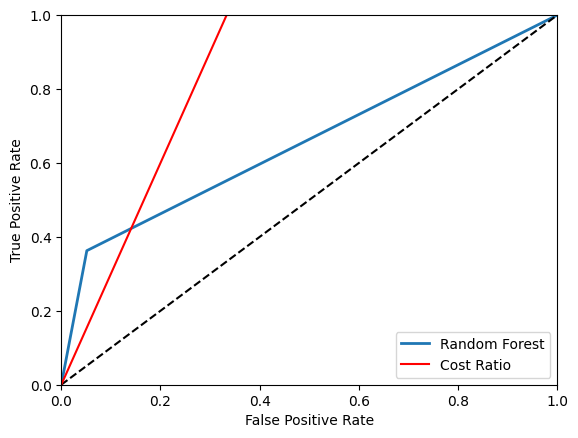

In [22]:
#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')

#plot a line with cost ratio in red
plt.plot([0, 1], [0, 3], 'r-', label="Cost Ratio")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

<a id='3d'></a>
## SVM

SVM
 Accuracy: 0.732

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       893
           1       0.73      0.71      0.72       852

    accuracy                           0.73      1745
   macro avg       0.73      0.73      0.73      1745
weighted avg       0.73      0.73      0.73      1745

 Confusion Matrix:


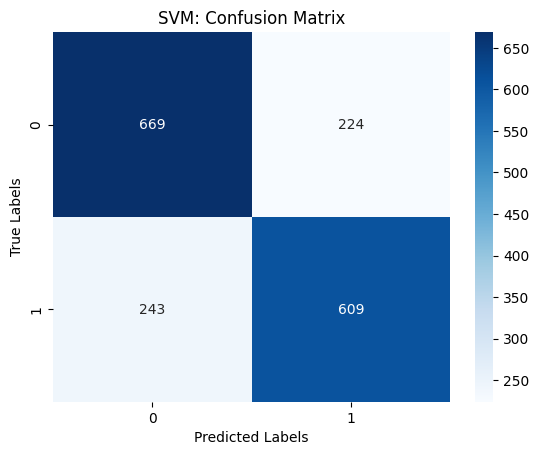

In [23]:
svmTuned = LinearSVC(max_iter = 1000000, random_state = 9)
svmTuned.fit(X_train, y_train)

y_pred_svm = svmTuned.predict(X_test)

evaluate(y_test, y_pred_svm, "SVM")

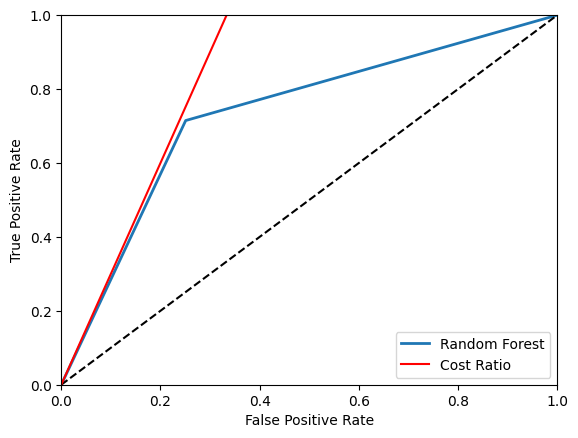

In [24]:
#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
plt.plot(fpr, tpr, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')

#plot a line with cost ratio in red
plt.plot([0, 1], [0, 3], 'r-', label="Cost Ratio")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## SVM with a twist

SVM with Cost Matrix
 Accuracy: 0.662

 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.94      0.74       893
           1       0.86      0.37      0.52       852

    accuracy                           0.66      1745
   macro avg       0.73      0.66      0.63      1745
weighted avg       0.73      0.66      0.63      1745

 Confusion Matrix:


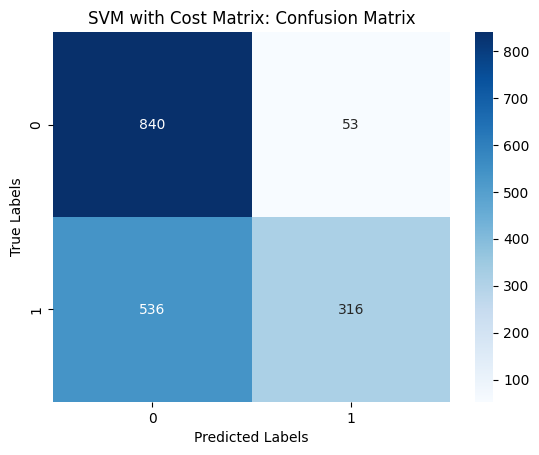

In [39]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

# Define the class weights according to your cost matrix
# The weight for the positive class (safe loans) should be inversely proportional to the benefit of correctly classifying it
# The weight for the negative class (risky loans) should be directly proportional to the cost of incorrectly classifying it as safe
class_weights = {1: 0.38, 0: 1} 

# Create and fit the SVM model
svm_model_cs = svm.SVC(class_weight=class_weights)
svm_model_cs.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model_cs.predict(X_test)



evaluate(y_test, y_pred, "SVM with Cost Matrix")


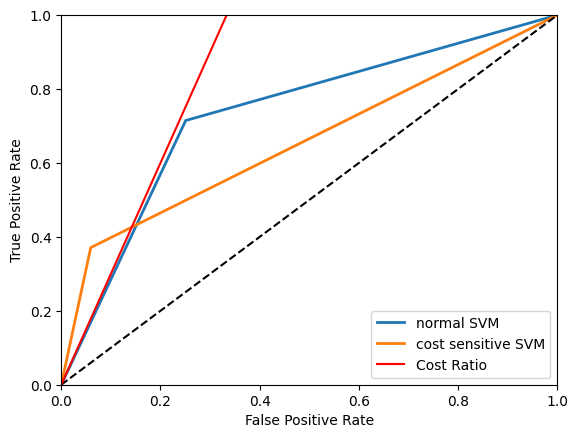

In [38]:
#plot roc curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fpr_n, tpr_n, thresholds = roc_curve(y_test, y_pred_svm)
plt.plot(fpr_n, tpr_n, linewidth=2, label="normal SVM")

plt.plot(fpr, tpr, linewidth=2, label="cost sensitive SVM")
plt.plot([0, 1], [0, 1], 'k--')

#plot a line with cost ratio in red
plt.plot([0, 1], [0, 3], 'r-', label="Cost Ratio")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

<a id='4'></a>
# Model Tuning

<a id='4a'></a>
## Random Forest GS

In [76]:
# Define the parameter grid for the Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Set up the HalvingGridSearchCV
rf_opt = HalvingGridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, factor=2, min_resources='exhaust')

# Fit the HalvingGridSearchCV to the data
rf_opt.fit(X_train, y_train)

# Get the best parameters
best_params_rf = rf_opt.best_params_
print("Best parameters for Random Forest:", best_params_rf)


Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [30]:
best_params_rf = {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}

# Use the best estimator to make predictions on the test data
y_pred_rf = rf_opt.best_estimator_.predict(X_test)

#evaluation
evaluate(y_test, y_pred_rf, "Random Forest")

NameError: name 'rf_opt' is not defined

<a id='4b'></a>
## Neural Network RS

In [41]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # how many model variations to test?
    executions_per_trial=3,  # how many trials per variation? (same model could perform differently)
    directory='model_dir',  
    project_name='tuning' 
)

tuner.search(x=X_train, y=y_train, epochs=50, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


INFO:tensorflow:Reloading Tuner from model_dir/tuning/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [42]:
# Build the model with the optimal hyperparameters and train it on the data
nn_opt = tuner.hypermodel.build(best_hps)
history = nn_opt.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5724 - accuracy: 0.7127 - val_loss: 0.5591 - val_accuracy: 0.7318
Epoch 2/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7273 - val_loss: 0.5573 - val_accuracy: 0.7284
Epoch 3/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7336 - val_loss: 0.5890 - val_accuracy: 0.7318
Epoch 4/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5478 - accuracy: 0.7368 - val_loss: 0.5588 - val_accuracy: 0.7301
Epoch 5/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7386 - val_loss: 0.5652 - val_accuracy: 0.7255
Epoch 6/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5384 - accuracy: 0.7424 - val_loss: 0.5574 - val_accuracy: 0.7301
Epoch 7/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5350 - accuracy: 0.7425 - val_loss: 0.5607 - val_accuracy: 0.7238
Epoch 

In [43]:
#model summary
nn_opt.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 416)               9984      
                                                                 
 dropout_3 (Dropout)         (None, 416)               0         
                                                                 
 dense_5 (Dense)             (None, 416)               173472    
                                                                 
 dropout_4 (Dropout)         (None, 416)               0         
                                                                 
 dense_6 (Dense)             (None, 416)               173472    
                                                                 
 dropout_5 (Dropout)         (None, 416)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

55/55 [==============================] - 0s 962us/step
Neural Network
 Accuracy: 0.701

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       893
           1       0.68      0.75      0.71       852

    accuracy                           0.70      1745
   macro avg       0.70      0.70      0.70      1745
weighted avg       0.70      0.70      0.70      1745

 Confusion Matrix:


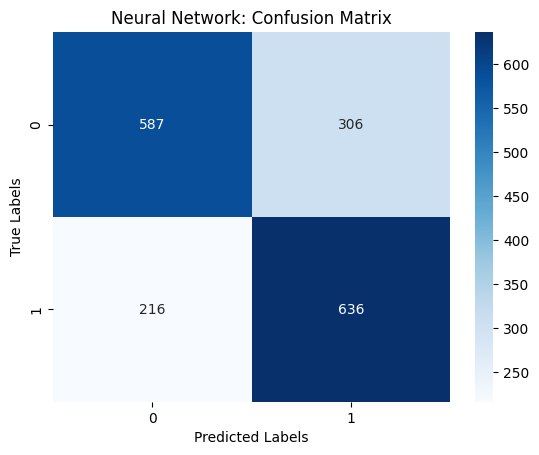

In [44]:
#evaluate the model
y_pred_nn = (nn_opt.predict(X_test) > 0.5).astype("int32")
evaluate(y_test, y_pred_nn, "Neural Network")

<a id='4c'></a>
## Logistic Regression GS

In [19]:
# Define the parameter grid for Logistic Regression with l2 penalty
param_grid_lr_l2 = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 5000, 50000, 100000]  # added larger max_iter
}

# Initialize the Logistic Regression classifier
lr = LogisticRegression()

# Set up the HalvingGridSearchCV for l2 penalty
grid_search_lr_l2 = HalvingGridSearchCV(estimator=lr, param_grid=param_grid_lr_l2, cv=5, n_jobs=-1, verbose=2, factor=2, min_resources='exhaust')

grid_search_lr_l2.fit(X_train, y_train)

# Clear the output of the Jupyter notebook
clear_output()

best_params_lr_l2 = grid_search_lr_l2.best_params_
print("Best parameters for Logistic Regression with l2 penalty:", best_params_lr_l2)

Best parameters for Logistic Regression with l2 penalty: {'C': 0.01, 'fit_intercept': False, 'max_iter': 100000, 'penalty': 'l2', 'solver': 'lbfgs'}


Logistic Regression
 Accuracy: 0.729

 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       893
           1       0.72      0.73      0.73       852

    accuracy                           0.73      1745
   macro avg       0.73      0.73      0.73      1745
weighted avg       0.73      0.73      0.73      1745

 Confusion Matrix:


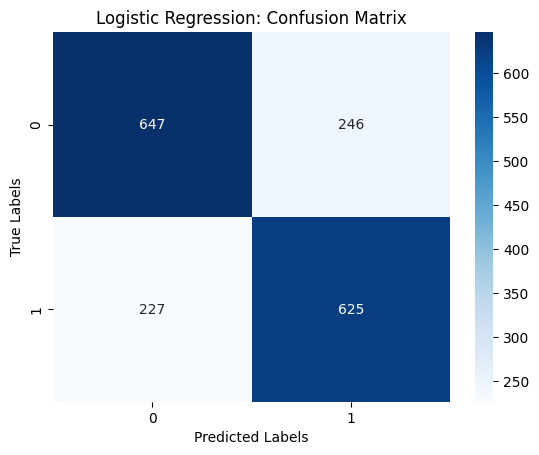

In [28]:
best_params_lr_l2 = {'C': 0.01, 'fit_intercept': False, 'max_iter': 100000, 'penalty': 'l2', 'solver': 'lbfgs'}
lr_opt = LogisticRegression(**best_params_lr_l2)

lr_opt.fit(X_train, y_train)
y_pred_lr = lr_opt.predict(X_test)

# Evaluation
evaluate(y_test, y_pred_lr, "Logistic Regression")

<a id='4d'></a>
## Support Vector Machine GS

In [29]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 50],
    'loss': ['hinge', 'squared_hinge']
}

# Initialize the SVM classifier 
svm = LinearSVC(max_iter=500000)

# Set up the GridSearchCV
svm_opt = GridSearchCV(svm, param_grid_svm, cv = 5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data 
svm_opt.fit(X_train, y_train)

# Get the best parameters 
best_params_svm = svm_opt.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/fredegot/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fredegot/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fredegot/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fredegot/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fredegot/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fredegot/opt/anaco

[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.4s
[CV] END ...................................C=10, loss=hinge; total time=   0.9s
[CV] END ...........................C=10, loss=squared_hinge; total time=  43.8s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.4s
[CV] END ...................................C=10, loss=hinge; total time=   1.6s
[CV] END ...........................C=10, loss=squared_hinge; total time=  46.6s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.7s
[CV] END ...................................C=10, loss=hinge; total time=   1.4s
[CV] END ...........................C=10, loss=squared_hinge; total time= 1.0min
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.4s
[CV] END ...................................C=10, loss=hinge; total time=   1.5s
[CV] END ...........................C=10, loss=squared_hinge; total time= 1.0min
[CV] END ...................

KeyboardInterrupt: 

SVM
 Accuracy: 0.727

 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       893
           1       0.73      0.70      0.71       852

    accuracy                           0.73      1745
   macro avg       0.73      0.73      0.73      1745
weighted avg       0.73      0.73      0.73      1745

 Confusion Matrix:


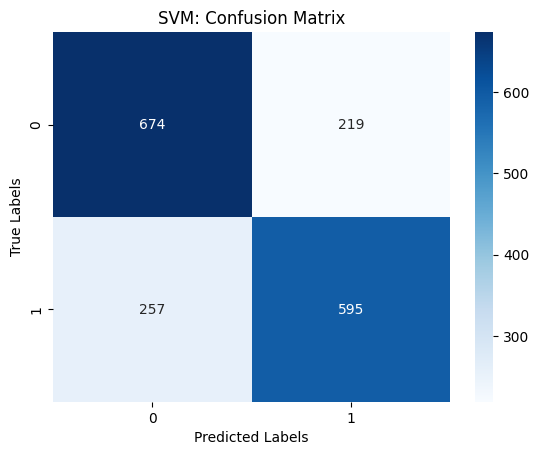

In [24]:
# USe the best estimator to make predictions on the test data 
y_pred_svm = svm_opt.best_estimator_.predict(X_test)

# Evaluating the model 
evaluate(y_test, y_pred_svm, "SVM")

<a id='5'></a>
# Voting Threshold Machine

1. Obtain the probabilities for each model's predictions on a given sample.
2. Apply the threshold to determine if a model's predicted probability is above 70%.
3. Count the number of models whose predicted probability exceeds the threshold.
4. Make the final prediction based on the voting results.

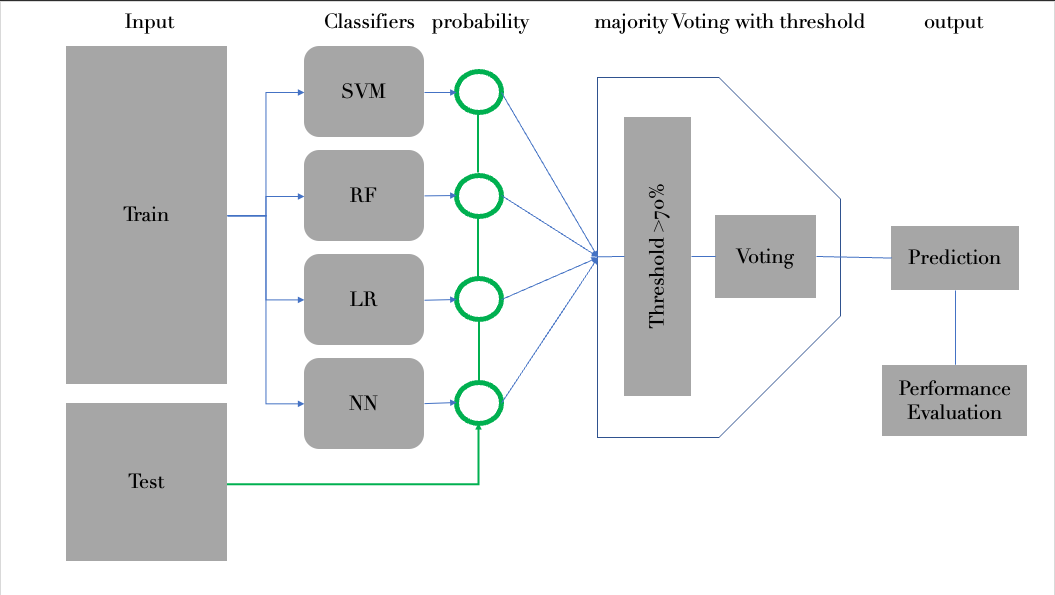


In [67]:
#loop from 0 to 10
for i in range(0, 11):

    sample = X_test[i]  # Select the first sample from the test set

    # Use the voting function to predict the class of the sample
    model_probs = model_probabilities(models, sample.reshape(1, -1), threshold= 0.7) 

    hlp.print_votes_and_prediction(model_probs, threshold=0.7)

    #actual class
    print("Actual class:", y_test.iloc[i])


Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.479331
1,LogisticRegression,0.459158
2,RandomForestClassifier,0.492791
3,Sequential,0.697300


Actual class: 1
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.326095
1,LogisticRegression,0.332374
2,RandomForestClassifier,0.241138
3,Sequential,0.583561


Actual class: 0
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.355295
1,LogisticRegression,0.215834
2,RandomForestClassifier,0.190360
3,Sequential,0.764185


Actual class: 0
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.294075
1,LogisticRegression,0.261038
2,RandomForestClassifier,0.248704
3,Sequential,0.370857


Actual class: 1
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.267807
1,LogisticRegression,0.144427
2,RandomForestClassifier,0.146636
3,Sequential,0.678390


Actual class: 0
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.414053
1,LogisticRegression,0.453157
2,RandomForestClassifier,0.399775
3,Sequential,0.614398


Actual class: 1
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.351184
1,LogisticRegression,0.370442
2,RandomForestClassifier,0.422430
3,Sequential,0.599044


Actual class: 0
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.655086
1,LogisticRegression,0.594048
2,RandomForestClassifier,0.624445
3,Sequential,0.770814


Actual class: 1
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.844839
1,LogisticRegression,0.813466
2,RandomForestClassifier,0.688841
3,Sequential,0.882271


Actual class: 1
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.445874
1,LogisticRegression,0.337428
2,RandomForestClassifier,0.519660
3,Sequential,0.970683


Actual class: 1
Threshold: 0.7
Model Votes:


,Model,Probability
0,SVC,0.800209
1,LogisticRegression,0.872068
2,RandomForestClassifier,0.734836
3,Sequential,0.971285


Actual class: 1


# Code for voting machine algorithm

In [252]:
# Define the models, see best parameters below for quick init

# Best parameters for Logistic Regression with l2 penalty: {'C': 0.01, 'fit_intercept': False, 'max_iter': 100000, 'penalty': 'l2', 'solver': 'lbfgs'}
# Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
# 

models = [svm_model_cs, lr_cs, rf_cs, nn_opt]


### Function that uses multiple models to vote on the classification of a sample

In [265]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function that uses multiple models to vote on the classification of a sample
def model_probabilities(models, sample, threshold):

    model_votes = []  # List to store the probabilities from models that voted

    # Iterate over each model
    for model in models:
        # Check if the model has a "predict_proba" method
        if hasattr(model, "predict_proba"):
            probabilities = model.predict_proba(sample)  # Get predicted probabilities
            # because different models return differnet shapes of theit probabilities output we need to check the shape
            # If probabilities is a 1D array
            if probabilities.ndim == 1:
                predicted_probability = probabilities[1]  # Assume binary classification
            else:  # If probabilities is a 2D array ( in teh case for LogisticRegression)
                predicted_probability = probabilities[0, 1]  # Assume binary classification

        # Check if the model has a "decision_function" method
        elif hasattr(model, "decision_function"):
            predicted_score = model.decision_function(sample)  # Get decision function score
            predicted_probability = sigmoid(predicted_score)  # Apply sigmoid function to convert score to a probability
            # If predicted_probability is a 1D array
            if predicted_probability.ndim == 1 and len(predicted_probability) == 1:
                predicted_probability = predicted_probability[0]  # Convert to scalar
            elif predicted_probability.ndim > 1:
                predicted_probability = predicted_probability[0, 1]  # Assume binary classification
        else:
        # If the model has an output_shape attribute with more than one dimension and the second dimension is 1
            if len(model.output_shape) > 1 and model.output_shape[1] == 1:
                predicted_probabilities = model(sample, training=False)  # Get predicted probabilities using direct call
                predicted_probability = predicted_probabilities[0, 0]  # Assume binary classification
            else:  # If the model doesn't have an output_shape attribute with more than one dimension and the second dimension is 1
                predicted_probabilities = model(sample, training=False)  # Get predicted probabilities using direct call
                predicted_probability = predicted_probabilities[0, 1]  # Assume binary classification


        model_votes.append((model, predicted_probability))  # Add the model and its predicted probability to the list of model votes
    
    return model_votes  # Return the prediction and the votes of the models that voted

### Voting algorithm variations

In [266]:
# Voting algo attempt 1
def actual_voting_algo1(model_probs, threshold):
    # Initialize a counter for models with prediction probability above threshold
    count = 0

    # Loop over the model votes
    for model, predicted_probability in model_probs:
        # If the predicted probability is greater than the threshold
        if predicted_probability > threshold:
            # Increment the counter
            count += 1

    # If two or more models have a prediction probability higher than the threshold
    if count >= 2:
        return 1
    else:
        return 0


In [270]:
# Voting algo attempt 2

def actual_voting_algo2(model_probs, threshold):
    # Compute the average prediction probability across all models
    avg_prob = sum(prob for model, prob in model_probs) / len(model_probs)

    # Initialize a counter for models with prediction probability above threshold
    count = 0

    # Loop over the model votes
    for model, predicted_probability in model_probs:
        # If the predicted probability is greater than both the threshold and the average probability
        if predicted_probability > threshold and predicted_probability > avg_prob:
            # Increment the counter
            count += 1

    # If two or more models have a prediction probability higher than the threshold and the average probability
    if count >= 2:
        return 1
    else:
        return 0


This attempt relies on the "certainness" of each model's prediction, but instead of simply checking whether the prediction probability is above a certain threshold, it also takes into account the average probability across all models. The idea is that if a model is very certain about its prediction (i.e., its prediction probability is well above the average), it should have a stronger influence on the final decision.

In [271]:
# Voting algo attempt 3
def actual_voting_algo3(model_probs, threshold):
    # Initialize a counter for the sum of weighted votes
    weighted_votes = 0

    # Loop over the model votes
    for model, predicted_probability in model_probs:
        # Add the weighted vote to the counter
        weighted_votes += predicted_probability

    # If the sum of weighted votes is greater than the threshold times the number of models
    if weighted_votes > threshold * len(model_probs):
        return 1
    else:
        return 0


The third attempt introduces a weighted voting system, where each model's vote is weighted by its prediction probability. The final decision is made based on the sum of these weighted votes.

Optimal threshold: 0.6
Actual profit: 184000$ 

In [272]:
# Voting algo attempt 4
def actual_voting_algo4(model_probs, threshold):
    # Initialize a counter for models with prediction probability above threshold
    count = 0

    # Loop over the model votes
    for model, predicted_probability in model_probs:
        # If any model is extremely certain that the loan is bad
        if predicted_probability < 0.3:
            # Veto the decision
            return 0

        # If the predicted probability is greater than the threshold
        if predicted_probability > threshold:
            # Increment the counter
            count += 1

    # If two or more models have a prediction probability higher than the threshold
    if count >= 2:
        return 1
    else:
        return 0


The fourth attempt introduces a "veto" system. If any model is extremely certain that the loan is bad (i.e., its prediction probability is below a certain low threshold), it can veto the decision and the final prediction will be 0 regardless of other models' votes. It performs well, and we could implement a gridsearch for the best threshold and veto threshold.

In [273]:
def actual_voting_algo5(model_probs, threshold):
    # Initialize a counter for models that predict a good loan
    count = 0

    # Loop over the model votes
    for model, predicted_probability in model_probs:
        # Calculate a dynamic threshold based on the model's certainty
        threshold = 0.5 + 0.5 * abs(predicted_probability - 0.5)

        # If the predicted probability is greater than the dynamic threshold
        if predicted_probability > threshold:
            # Increment the counter
            count += 1

    # If a majority of models predict a good loan
    if count > len(model_probs) / 2:
        return 1
    else:
        return 0


In the 5th attempt, we use a sliding scale threshold. Instead of having a fixed threshold for all models, we adjust the threshold for each model based on its 'certainty'. A model that is very certain (i.e., its predicted probability is close to 1 or 0) will have a lower threshold, while a model that is less certain (i.e., its predicted probability is close to 0.5) will have a higher threshold. The rationale is that if a model is very certain about its prediction, we should trust it more. Works very well with low cost ratio (1-3)

### Functions for expected profit for each voting algorithm

In [496]:
def calculate_profit_algo(TP, FP, profit_TP_algo, loss_FP):

    # Calculate the profit
    profit = TP * profit_TP_algo - FP * loss_FP
    
    return profit

def voting_algo_expected_profit(models, actual_voting_algo, size, profit_TP_algo, loss_FP, X_test, y_test, threshold):
    random_indices = np.random.choice(X_test.shape[0], size=size, replace=False)
    random_examples = X_test[random_indices]
    actual_classes = y_test.iloc[random_indices.tolist()]

    # Initialize counters
    TP = 0 # True positives counter 
    FP = 0 # False positives counter 
    TN = 0 # True negatives counter
    FN = 0 # False negatives counter

    possible_profit = 0 # Counter for possible profit
    actual_profit = 0 # Counter for actual profit
    
    # Apply the voting function to each random example
    for i, example in enumerate(random_examples):
        model_probs = model_probabilities(models, example.reshape(1, -1), threshold)
        prediction = actual_voting_algo(model_probs, threshold)

        # Update the counters
        # If the prediction is correct and the actual class is 1 (loan is good) then increment TP by 1 
        if prediction == 1 and actual_classes.iloc[i] == 1:
            TP += 1
        # If the prediction is incorrect (loan is bad) and the actual class is 0 then increment FP by 1
        elif prediction == 1 and actual_classes.iloc[i] == 0:
            FP += 1

        # If the prediction is correct and the actual class is 0 (loan is bad) then increment TN by 1
        if prediction == 0 and actual_classes.iloc[i] == 0:
            TN += 1
        elif prediction == 0 and actual_classes.iloc[i] == 1:
            FN += 1
        

        # If the actual class is 1 (loan is good) then increment possible_profit by potential profit
        if actual_classes.iloc[i] == 1:
            possible_profit += profit_TP_algo

    actual_profit = calculate_profit_algo(TP, FP, profit_TP_algo, loss_FP)

    return actual_profit, possible_profit, TP, FP, TN, FN


### Function for best threshold for each algorithm

In [497]:
def algo_grid_threshold(models,actual_voting_algo,size, profit_TP_algo, loss_FP, X_test, y_test, start, stop, step):
    best_threshold = 0 
    best_profit = 0
    possible_profit = 0
    
    # Test various thresholds
    for threshold in np.arange(start, stop, step):
        actual_profit, possible_profit_temp, _, _, _, _ = voting_algo_expected_profit(models, actual_voting_algo, size, profit_TP, loss_FP, X_test, y_test, threshold)

        if actual_profit > best_profit:
            best_profit = actual_profit
            possible_profit = possible_profit_temp
            best_threshold = threshold

    #print(f"Optimal threshold: {round(best_threshold,2)}")
    #print(f"Actual profit: {best_profit}$ / max. possible profit: {possible_profit}$ ({round((best_profit/possible_profit*100),2)}%)")
    
    return best_threshold, best_profit
    

### Gridsearch for best voting algorithm for each cost ratio

In [520]:
def voting_algo_grid(voting_algo_list, X_test, y_test, profit_TP_algo, loss_FP_list, size):
    
    # Each ratio is decided by the size of the loss
    for loss_FP in loss_FP_list:
        
        best_profit = 0
        best_algo = 0 
        best_threshold = 0 # Initiate best threshold, best_algo, best_profit for each ratio

        ratio = profit_TP_list[0]/loss_FP # calculate ratio
        
        loss_FP = loss_FP
        
        voting_algo_nr = 0 # initiate algorithm counter
        print(f"Finding best voting algorithm for the ratio of {round(ratio,2)}...")
        for algo in voting_algo_list:
            voting_algo_nr += 1
            threshold, profit = algo_grid_threshold(models, algo, size, profit_TP_algo, loss_FP, X_test, y_test, start=0.5, stop=0.8, step=0.1)
            if best_profit < profit:
                best_profit = profit
                best_algo = voting_algo_nr
                best_threshold = threshold
            #print(f"For ratio {round(ratio,2)}, voting algorithm {voting_algo_nr} has the profit of {profit} with the threshold {round(threshold,2)}.\n")
            
        print(f"For ratio {round(ratio,2)}, voting algorithm {best_algo} has the highest profit of {best_profit} with the threshold {round(best_threshold,2)}.\n")
    

#### Set Variables for Grid Search

In [523]:
voting_algo_list = [actual_voting_algo1, actual_voting_algo2, actual_voting_algo3, actual_voting_algo4, actual_voting_algo5]

profit_TP_algo = 1000 # profit for true positive
loss_FP_list = [2000,3000,10000] # loss for False Positive

size = 1745


Profit is 184000 with threshold = 0.6, size = 1745, ratio = 1/3 and algo = algo3

In [524]:
voting_algo_grid(voting_algo_list, X_test, y_test, profit_TP_list, loss_FP_list,size)

Finding best voting algorithm for the ratio of 0.5...
For ratio 0.5, voting algorithm 1 has the highest profit of 239000 with the threshold 0.5.

Finding best voting algorithm for the ratio of 0.33...
For ratio 0.33, voting algorithm 3 has the highest profit of 184000 with the threshold 0.6.

Finding best voting algorithm for the ratio of 0.1...
For ratio 0.1, voting algorithm 3 has the highest profit of 36000 with the threshold 0.7.



# Helper functions for generating tables

In [269]:
#helper function
def calculate_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    
    metrics = {
        'accuracy': round(accuracy, 4),
        'recall': round(recall, 4),
        'precision': round(precision, 4)
    }
    return metrics


### large latex table

In [57]:
from tabulate import tabulate
import pyperclip


In [58]:
# Dictionary of model names and predictions
model_p = {'RF': y_pred_rf, 'NN': y_pred_nn, 
           'SVM': y_pred_svm, 'LR': y_pred_lr}

# List to store the table rows
table_rows = []

# Loop through model_p
for model in model_p:
    # Key-value pair of model name and prediction
    y_pred = model_p[model]

    # get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Calculate metrics
    metrics = calculate_metrics(TP, TN, FP, FN)

    # Append model name, accuracy, recall, precision, TP, FP to the rows list
    table_rows.append([model, f'{metrics["precision"] * 100:.2f}', f'{metrics["recall"] * 100:.2f}', f'{metrics["accuracy"] * 100:.2f}', TP, FP])

# Manually calculate for the Ensemble Model
TP = 323
FP = 60
TN = 833
FN = 529

# Calculate metrics
metrics = calculate_metrics(TP, TN, FP, FN)

table_rows.append(['VTM', f'{metrics["precision"] * 100:.2f}', f'{metrics["recall"] * 100:.2f}', f'{metrics["accuracy"] * 100:.2f}', TP, FP])

# Define the DataFrame
df = pd.DataFrame(table_rows, columns=['Model', 'Prec', 'Rec', 'Acc','TP', 'FP'])

#sort df by Precision from low to high
df = df.sort_values(by=['Prec'], ascending=True)

# display the table without index
print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

#copy to clipboard for latex
pyperclip.copy(df.to_latex(index=False))

+---------+--------+-------+-------+------+------+
| Model   |   Prec |   Rec |   Acc |   TP |   FP |
|---------+--------+-------+-------+------+------|
| NN      |  67.52 | 74.65 | 70.09 |  636 |  306 |
| LR      |  71.76 | 73.36 | 72.89 |  625 |  246 |
| SVM     |  73.11 | 71.48 | 73.24 |  609 |  224 |
| VTM     |  84.33 | 37.91 | 66.25 |  323 |   60 |
| RF      |  88.36 | 34.74 | 65.9  |  296 |   39 |
+---------+--------+-------+-------+------+------+


/var/folders/cw/zth_v8n95633qh4s8trd9zn00000gn/T/ipykernel_61563/3776502323.py:47: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(df.to_latex(index=False))


In the context of loan classification, the Ensemble model stands out as the best model despite its lower accuracy. This is primarily due to its notably higher precision, which is the most critical metric in this scenario.

Precision, as previously defined, is the proportion of true positives (correctly identified good loans) out of all predicted positives (loans that the model predicted to be good). A high precision, as shown by the Ensemble model (86.63%), means the model has a low false positive rate, which translates to fewer bad loans being incorrectly classified as good. This is particularly important in our context, as the financial repercussions of approving a bad loan (false positive) are significantly more severe than missing out on a good loan (false negative).

While the Ensemble model's accuracy is relatively lower, accuracy is not as critical in our scenario because it treats both types of errors (false positives and false negatives) equally. However, in our case, these errors have different financial implications, with false positives being far more costly.

The lower recall of the Ensemble model implies that it classifies a smaller proportion of the actual good loans correctly. But in a scenario where the cost of false positives is much higher than the cost of false negatives, the model's high precision proves to be more valuable. Therefore, considering the specific requirements and cost implications of the loan classification problem, the Ensemble model's high precision makes it the most suitable choice among the presented models.

### seaborn prot barchart

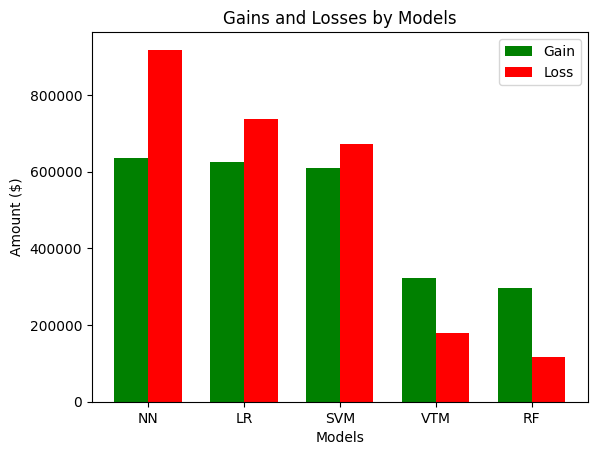

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df['Gain'] = df['TP'] * 1000
df['Loss'] = df['FP'] * 3000

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set bar width
bar_width = 0.35

# Position of bars on x-axis
ind = np.arange(len(df['Model']))

# Create bars
gain_bars = ax.bar(ind - bar_width/2, df['Gain'], bar_width, label='Gain',color='g')
loss_bars = ax.bar(ind + bar_width/2, df['Loss'], bar_width, label='Loss',color='r')

ax.set_xlabel('Models')
ax.set_ylabel('Amount ($)')
ax.set_title('Gains and Losses by Models')
ax.set_xticks(ind)
ax.set_xticklabels(df['Model'])
ax.legend()

# Show the plot
plt.show()